In [321]:
import numpy as np
import math
import random
import seaborn as sb

In [302]:
k = 8
p = 0.6
n = 180

In [303]:
P = np.array([])
for i in range(k + 1):
    cur = math.comb(k, i) * p ** i * (1 - p) ** (k - i)
    P = np.append(P, cur)
    
U = np.array([])
s = 0
for i in P:
    s += i
    U = np.append(U, s)

In [304]:
y = np.array([])
for i in range(n):
    y = np.append(y, random.random())

x = np.array([])
for y_n in y:
    for i in range(U.size):
        if y_n < U[i]:
            x = np.append(x, i)
            break
            
frequency = np.array([])
for i in range(k + 1):
    frequency = np.append(frequency, np.count_nonzero(x == i))
    
relative_frequency = np.array([])
for i in range(frequency.size):
    relative_frequency = np.append(relative_frequency, frequency[i] / n) 
    
accumulated_frequency = np.array([])
s = 0
for i in relative_frequency:
    s += i
    accumulated_frequency = np.append(accumulated_frequency, s)

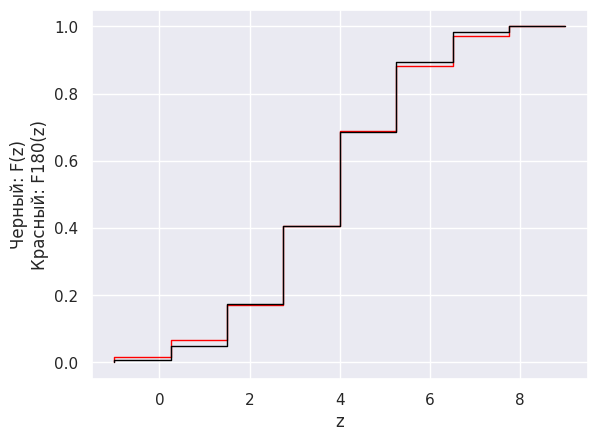

In [322]:
z = np.linspace(-1, 9, accumulated_frequency.size)
sb.set_theme()
plt.step(z, accumulated_frequency, linewidth = 1.0, color='red')
plt.step(z, U, linewidth = 1.0, color='black')
plt.xlabel("z")
plt.ylabel("Черный: F(z)\nКрасный: F180(z)")
plt.show()